<a href="https://colab.research.google.com/github/Svetorus/Time-Series/blob/master/TS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## 1.  
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [0]:
duq = pd.read_csv("./DUQ_hourly.csv", index_col=[0], parse_dates=[0])

In [0]:
duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [0]:
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [0]:
#Статистика
duq.describe().T

,count,mean,std,min,25%,50%,75%,max
DUQ_MW,119068.0,1658.820296,301.74064,1014.0,1444.0,1630.0,1819.0,3054.0


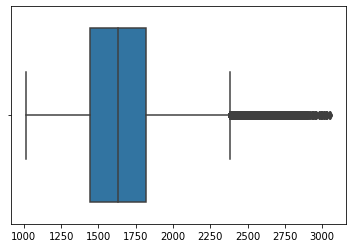

In [0]:
# визуализация боксплотом:
sns.boxplot(duq.values);

In [0]:
# Сколько пропусков:
duq['DUQ_MW'].isnull().sum()

0

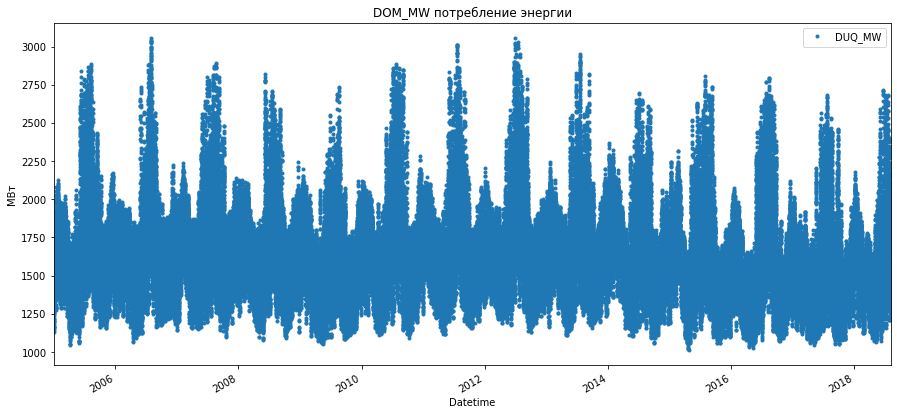

In [0]:
# Построим график временного ряда:
duq.plot( style = '.', figsize = ( 15, 7 ), title = 'DOM_MW потребление энергии' )
plt.ylabel ( 'МВт' );

Прослеживается легкий убывающий тренд;  
Четко видно сезонные колебания.

In [0]:
# Уникальных индексов на 4 меньше, кол-во в ряду (119069):
duq.index.nunique()

119064

In [0]:
# Перенесем дату и время в отдельный признак:
duq.reset_index(inplace=True)
duq.head(2)

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0


In [0]:
# Подсчитаем размеры временных отсчетов и количества каждого из них:
timedelta = duq['Datetime'] - duq['Datetime'].shift()
timedelta = timedelta.dt.seconds
timedelta.value_counts()

3600.0    119039
7200.0        24
0.0            4
Name: Datetime, dtype: int64

Отметки идут с шагом 1 час. Но имеется 24 случая, когда 2 часа - возможно, это пропуск; также, 4 случая, когда 0 часов -  возможно,это 4 значения неуникальных даты и времени.

### Проверяем DOM_hourly.csv

In [0]:
dom = pd.read_csv("./DOM_hourly.csv", index_col=[0], parse_dates=[0])

In [0]:
dom.head().T

Datetime,2005-12-31 01:00:00,2005-12-31 02:00:00,2005-12-31 03:00:00,2005-12-31 04:00:00,2005-12-31 05:00:00
DOM_MW,9389.0,9070.0,9001.0,9042.0,9132.0


In [0]:
dom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116189 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DOM_MW    116189 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [0]:
#Статистика
dom.describe().T

,count,mean,std,min,25%,50%,75%,max
DOM_MW,116189.0,10949.203625,2413.946569,1253.0,9322.0,10501.0,12378.0,21651.0


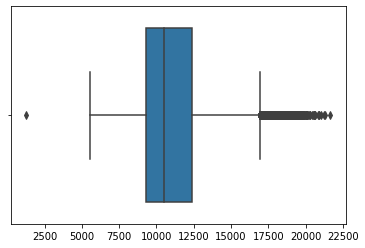

In [0]:
# визуализация боксплотом:
sns.boxplot(dom.values);

In [0]:
# Сколько пропусков:
dom['DOM_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

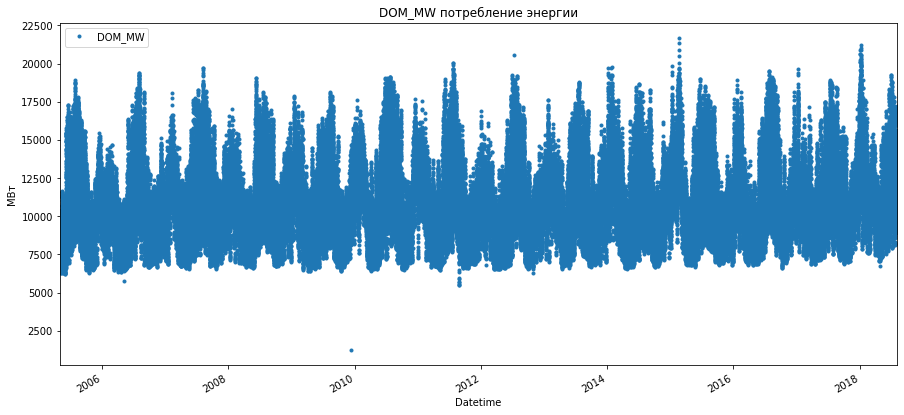

In [0]:
# Построим график временного ряда:
dom.plot( style = '.', figsize = ( 15, 7 ), title = 'DOM_MW потребление энергии' )
plt.ylabel ( 'МВт' )

#### Рис.1 потребление энергии за весь период ряда  
Явно прослеживаются сезонные колебания;  
С легким возрастающим трендом.

### Посмотрим проблему в конце 2009 года

In [0]:
# Перенесем дату и время в отдельный признак 'date':
dom['date'] = dom.index
dom_2009 = dom.loc[np.logical_and( np.logical_and( dom['date'].dt.year == 2009 , dom['date'].dt.month == 12), dom['date'].dt.day == 12)]

In [0]:
dom1 = dom['2009-12-10' :'2009-12-13']

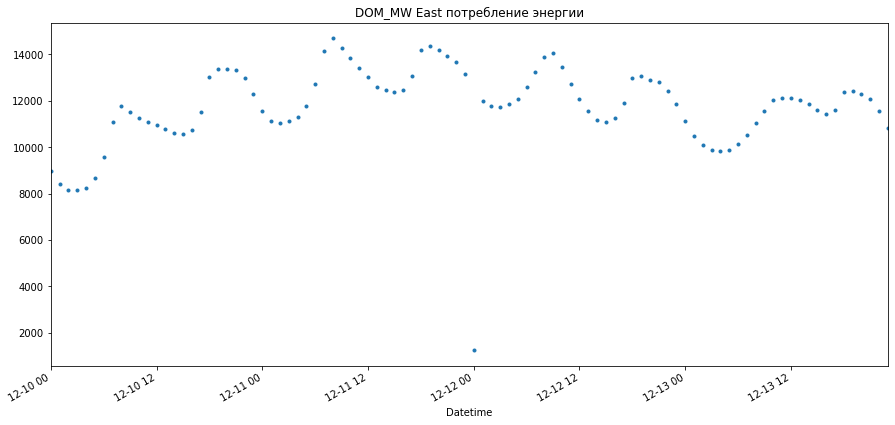

In [0]:
_ = dom1['DOM_MW'].plot( style='.', figsize=( 15, 7 ), title='DOM_MW East потребление энергии' )

Явно виден провал 12 декабря в 00-00, что-то случилось(перезапуск систем), что привело к почти полному прекращению потребления энергии.

### Посмотрим проблему в конце летнего сезона 2012 года

In [0]:
dom_2011 = dom.loc[np.logical_and( np.logical_and( dom['date'].dt.year == 2011 , dom['date'].dt.month == 8), dom['date'].dt.day > 24)]

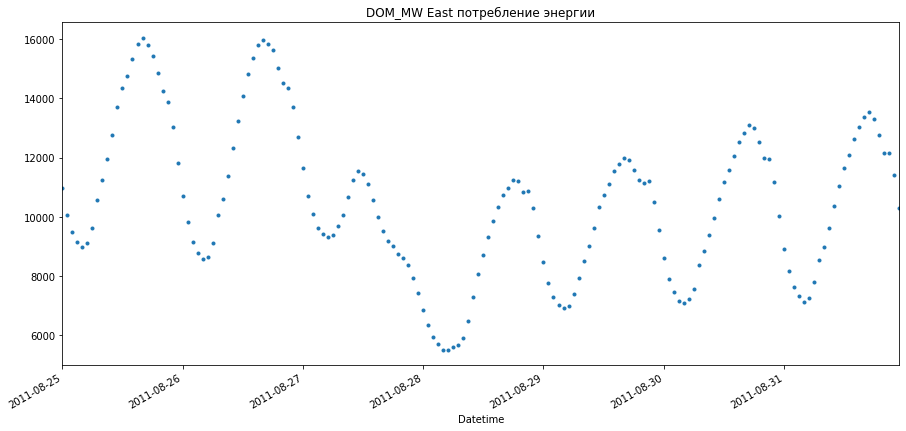

In [0]:
_ = dom_2011['DOM_MW'].plot( style='.', figsize=( 15, 7 ), title='DOM_MW East потребление энергии')

Ураган Айрин приближался к востоку Америки, были эвакуированы несколько штатов.

In [0]:
#!pip install pandas_profiling
#import pandas_profiling

In [0]:
#pandas_profiling.ProfileReport(dom)

## 2. 
Прочитайте базу Brent и сделайте ее перрасчет (ресемплинг) в представление по неделям , по месяцам.

In [0]:
data = pd.read_excel("./нефть-brent 2010-2019.xlsx", index_col=[0], parse_dates=[0])

In [0]:
# по неделям
data.resample("W", how='mean').head(7).T

Дата,2010-09-05 00:00:00,2010-09-12 00:00:00,2010-09-19 00:00:00,2010-09-26 00:00:00,2010-10-03 00:00:00,2010-10-10 00:00:00,2010-10-17 00:00:00
Значение,76.616,77.673333,78.693333,78.518333,81.211667,84.146667,83.498333


In [0]:
# по месяцам
data.resample("M", how='mean').head(7).T

Дата,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00
Значение,78.228148,83.473462,86.178077,92.232308,97.0332,104.45125,114.811538


In [0]:
# по годам
data.resample("Y", how='mean').head(7).T

Дата,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00
Значение,84.963238,110.758746,111.377484,108.137114,99.435493,53.969743,45.350502


## 3.
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

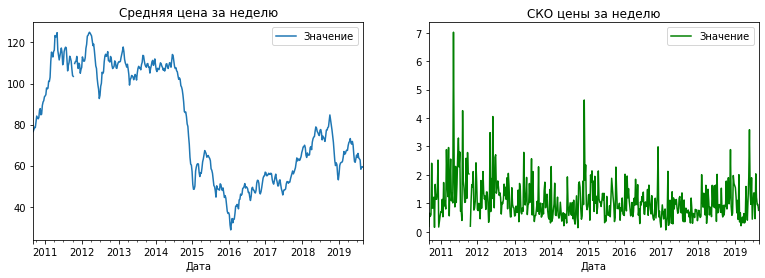

In [0]:
# изменения по неделям
_, axes = plt.subplots(1, 2, figsize=(13, 4))

data.resample('W').mean().plot(ax=axes[0])
axes[0].set_title(f'Средняя цена за неделю')
    
data.resample('W').std(ddof=1).plot(ax=axes[1], c='green')
axes[1].set_title(f'СКО цены за неделю');

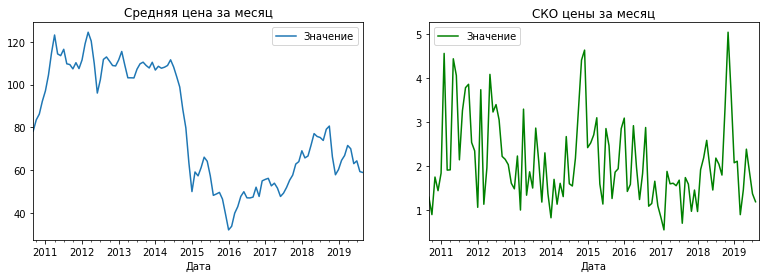

In [0]:
# изменения по месяцам
_, axes = plt.subplots(1, 2, figsize=(13, 4))

data.resample('M').mean().plot(ax=axes[0])
axes[0].set_title(f'Средняя цена за месяц')
    
data.resample('M').std(ddof=1).plot(ax=axes[1],c='green')
axes[1].set_title(f'СКО цены за месяц');

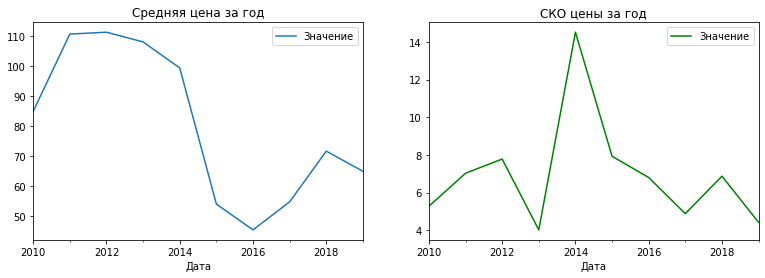

In [0]:
# изменения по годам
_, axes = plt.subplots(1, 2, figsize=(13, 4))

data.resample('Y').mean().plot(ax=axes[0])
axes[0].set_title(f'Средняя цена за год')
    
data.resample('Y').std(ddof=1).plot(ax=axes[1],c='green')
axes[1].set_title(f'СКО цены за год');

## 4.
#### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Как видно из значений, между дневными и недельными значениями минимальны. Заметное различие между недельными и месячными значениями. 

In [0]:
# по дням
data.resample("D", how='mean').head(7).T

Дата,2010-09-01 00:00:00,2010-09-02 00:00:00,2010-09-03 00:00:00,2010-09-04 00:00:00,2010-09-05 00:00:00,2010-09-06 00:00:00,2010-09-07 00:00:00
Значение,76.37,76.89,76.57,76.62,76.63,76.87,77.26


In [0]:
# по неделям
data.resample("W", how='mean').head(7).T

Дата,2010-09-05 00:00:00,2010-09-12 00:00:00,2010-09-19 00:00:00,2010-09-26 00:00:00,2010-10-03 00:00:00,2010-10-10 00:00:00,2010-10-17 00:00:00
Значение,76.616,77.673333,78.693333,78.518333,81.211667,84.146667,83.498333


In [0]:
# по месяцам
data.resample("M", how='mean').head(7).T

Дата,2010-09-30 00:00:00,2010-10-31 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00
Значение,78.228148,83.473462,86.178077,92.232308,97.0332,104.45125,114.811538


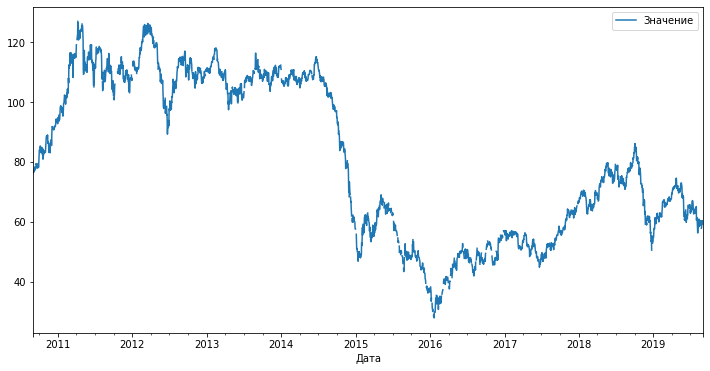

In [0]:
# по дням
data_w = data.resample('D', how='mean')
data_w.plot(figsize=(12,6));

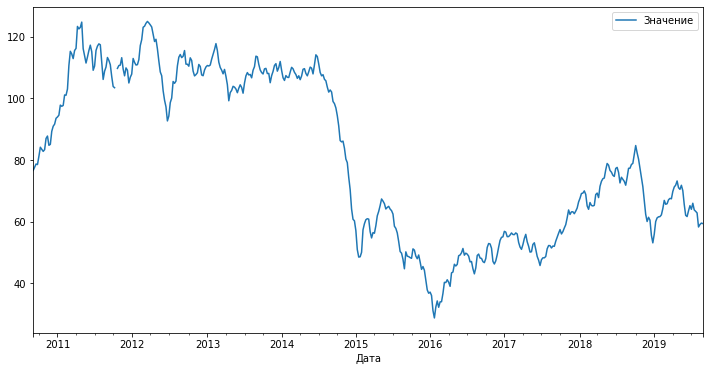

In [0]:
# по неделям
data_m = data.resample('W', how='mean')
data_m.plot(figsize=(12,6));

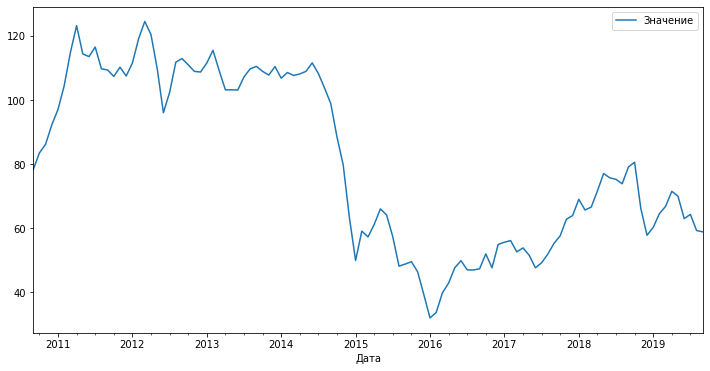

In [0]:
# по месяцам
data_m = data.resample('M', how='mean')
data_m.plot(figsize=(12,6));

**На всех графиках прослеживается общий тренд, за исключением детальности.**